In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('Car-mpg- Dataset.csv')
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [3]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [4]:
df.corr()

,mpg,cyl,disp,wt,acc,yr,origin,car_type
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450,0.759207
cyl,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543,-0.912577
disp,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409,-0.855141
wt,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024,-0.815445
acc,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873,0.385187
yr,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662,0.305194
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000,0.572691
car_type,0.759207,-0.912577,-0.855141,-0.815445,0.385187,0.305194,0.572691,1.000000


In [5]:
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin,car_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,0.530151
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,0.499718
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [7]:
df.drop('car_name', axis=1, inplace=True)
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [8]:
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,america,0
1,15.0,8,350.0,165,3693,11.5,70,america,0
2,18.0,8,318.0,150,3436,11.0,70,america,0
3,16.0,8,304.0,150,3433,12.0,70,america,0
4,17.0,8,302.0,140,3449,10.5,70,america,0


In [9]:
df = pd.get_dummies(data=df, columns=['origin'])
df.head()

# This is called one hot coding

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0


In [11]:
df[df['hp'].str.isdigit() == False]
df = df.replace('?', np.nan)

In [12]:
df[df.isnull().any(axis = 1)]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,1,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,1,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1,0,0


In [13]:
df = df.apply(lambda x: x.fillna(x.median()))

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
mpg               398 non-null float64
cyl               398 non-null int64
disp              398 non-null float64
hp                398 non-null object
wt                398 non-null int64
acc               398 non-null float64
yr                398 non-null int64
car_type          398 non-null int64
origin_america    398 non-null int64
origin_asia       398 non-null int64
origin_europe     398 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 34.3+ KB


In [17]:
df['hp'] = df['hp'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
mpg               398 non-null float64
cyl               398 non-null int64
disp              398 non-null float64
hp                398 non-null float64
wt                398 non-null int64
acc               398 non-null float64
yr                398 non-null int64
car_type          398 non-null int64
origin_america    398 non-null int64
origin_asia       398 non-null int64
origin_europe     398 non-null int64
dtypes: float64(4), int64(7)
memory usage: 34.3 KB


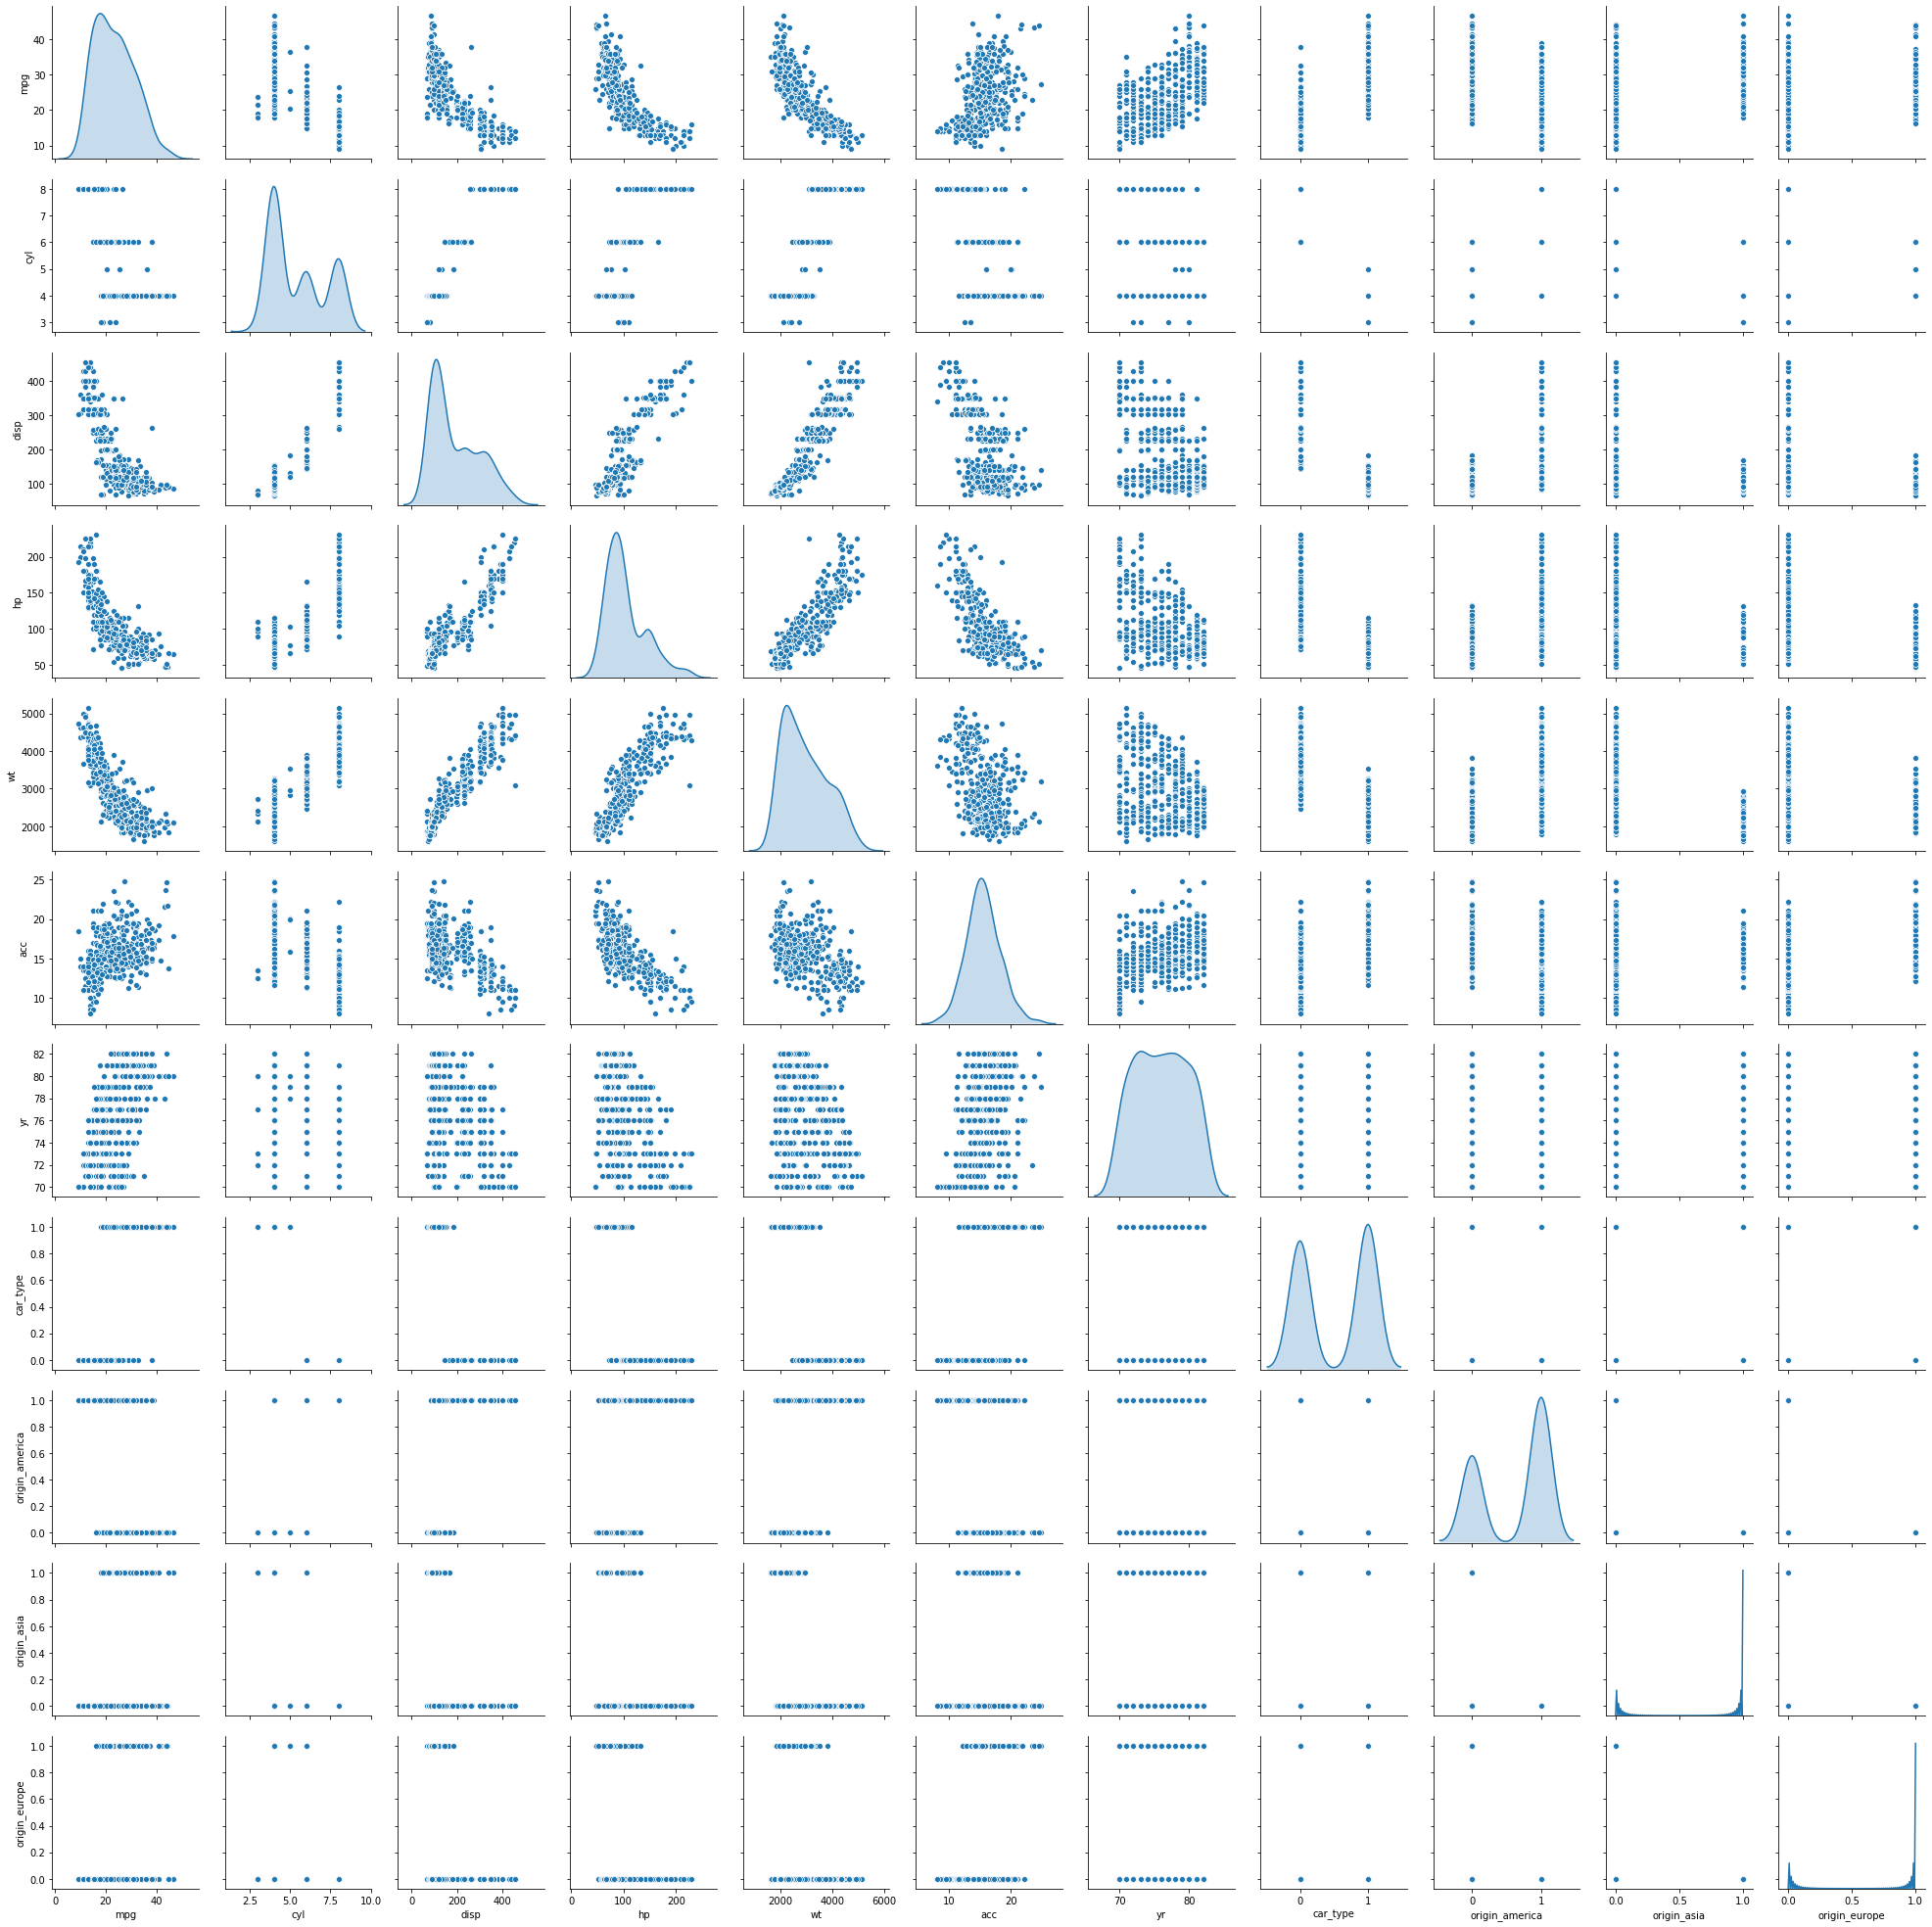

In [19]:
sns.pairplot(df, diag_kind='kde')

In [25]:
X = df.drop('mpg', axis = 1) # dependent variables
y = df['mpg'] # independent variable

In [27]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1 )

In [40]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
for index,col_name in enumerate(X_train.columns):
    print('Coeff for {} is {}'.format(col_name, linear_regression.coef_[index]))

Coeff for cyl is 1.4750732919168092
Coeff for disp is 0.024349322002431478
Coeff for hp is -0.0468619103932529
Coeff for wt is -0.006564163296278441
Coeff for acc is 0.04170227918809953
Coeff for yr is 0.7938975478842015
Coeff for car_type is 5.966597439861036
Coeff for origin_america is -1.4243481095472283
Coeff for origin_asia is 0.6521119249598709
Coeff for origin_europe is 0.7722361845873518


In [46]:
intercept = linear_regression.intercept_
intercept

-28.2353955684975

In [48]:
# R^2 coeff of determinant
linear_regression.score(X_test, y_test)

0.8513421387780062

In [50]:
# Round 2. Using polynomial
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True) # create the feature only when the two independent variables are interacting with each other

In [51]:
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)
poly_lin_reg = LinearRegression()

In [52]:
poly_lin_reg.fit(X_train_, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
poly_lin_reg.score(X_test_, y_test)
# No significant changes in the performance

0.8626121616499312

In [62]:
print(X_train.shape)
print(X_train_.shape)

(278, 10)
278


In [65]:
for index, coeff in enumerate(X_train_):
    for idx,item in enumerate(coeff):
        print("Coeff at {},{} is {}".format(index,idx, item))

Coeff at 0,0 is 1.0
Coeff at 0,1 is 4.0
Coeff at 0,2 is 105.0
Coeff at 0,3 is 63.0
Coeff at 0,4 is 2215.0
Coeff at 0,5 is 14.9
Coeff at 0,6 is 81.0
Coeff at 0,7 is 1.0
Coeff at 0,8 is 1.0
Coeff at 0,9 is 0.0
Coeff at 0,10 is 0.0
Coeff at 0,11 is 420.0
Coeff at 0,12 is 252.0
Coeff at 0,13 is 8860.0
Coeff at 0,14 is 59.6
Coeff at 0,15 is 324.0
Coeff at 0,16 is 4.0
Coeff at 0,17 is 4.0
Coeff at 0,18 is 0.0
Coeff at 0,19 is 0.0
Coeff at 0,20 is 6615.0
Coeff at 0,21 is 232575.0
Coeff at 0,22 is 1564.5
Coeff at 0,23 is 8505.0
Coeff at 0,24 is 105.0
Coeff at 0,25 is 105.0
Coeff at 0,26 is 0.0
Coeff at 0,27 is 0.0
Coeff at 0,28 is 139545.0
Coeff at 0,29 is 938.7
Coeff at 0,30 is 5103.0
Coeff at 0,31 is 63.0
Coeff at 0,32 is 63.0
Coeff at 0,33 is 0.0
Coeff at 0,34 is 0.0
Coeff at 0,35 is 33003.5
Coeff at 0,36 is 179415.0
Coeff at 0,37 is 2215.0
Coeff at 0,38 is 2215.0
Coeff at 0,39 is 0.0
Coeff at 0,40 is 0.0
Coeff at 0,41 is 1206.9
Coeff at 0,42 is 14.9
Coeff at 0,43 is 14.9
Coeff at 0,44 is 0

Coeff at 26,36 is 269500.0
Coeff at 26,37 is 0.0
Coeff at 26,38 is 3850.0
Coeff at 26,39 is 0.0
Coeff at 26,40 is 0.0
Coeff at 26,41 is 595.0
Coeff at 26,42 is 0.0
Coeff at 26,43 is 8.5
Coeff at 26,44 is 0.0
Coeff at 26,45 is 0.0
Coeff at 26,46 is 0.0
Coeff at 26,47 is 70.0
Coeff at 26,48 is 0.0
Coeff at 26,49 is 0.0
Coeff at 26,50 is 0.0
Coeff at 26,51 is 0.0
Coeff at 26,52 is 0.0
Coeff at 26,53 is 0.0
Coeff at 26,54 is 0.0
Coeff at 26,55 is 0.0
Coeff at 27,0 is 1.0
Coeff at 27,1 is 8.0
Coeff at 27,2 is 302.0
Coeff at 27,3 is 139.0
Coeff at 27,4 is 3570.0
Coeff at 27,5 is 12.8
Coeff at 27,6 is 78.0
Coeff at 27,7 is 0.0
Coeff at 27,8 is 1.0
Coeff at 27,9 is 0.0
Coeff at 27,10 is 0.0
Coeff at 27,11 is 2416.0
Coeff at 27,12 is 1112.0
Coeff at 27,13 is 28560.0
Coeff at 27,14 is 102.4
Coeff at 27,15 is 624.0
Coeff at 27,16 is 0.0
Coeff at 27,17 is 8.0
Coeff at 27,18 is 0.0
Coeff at 27,19 is 0.0
Coeff at 27,20 is 41978.0
Coeff at 27,21 is 1078140.0
Coeff at 27,22 is 3865.6000000000004
Coeff

Coeff at 49,10 is 0.0
Coeff at 49,11 is 1500.0
Coeff at 49,12 is 660.0
Coeff at 49,13 is 21120.0
Coeff at 49,14 is 98.39999999999999
Coeff at 49,15 is 462.0
Coeff at 49,16 is 0.0
Coeff at 49,17 is 6.0
Coeff at 49,18 is 0.0
Coeff at 49,19 is 0.0
Coeff at 49,20 is 27500.0
Coeff at 49,21 is 880000.0
Coeff at 49,22 is 4100.0
Coeff at 49,23 is 19250.0
Coeff at 49,24 is 0.0
Coeff at 49,25 is 250.0
Coeff at 49,26 is 0.0
Coeff at 49,27 is 0.0
Coeff at 49,28 is 387200.0
Coeff at 49,29 is 1803.9999999999998
Coeff at 49,30 is 8470.0
Coeff at 49,31 is 0.0
Coeff at 49,32 is 110.0
Coeff at 49,33 is 0.0
Coeff at 49,34 is 0.0
Coeff at 49,35 is 57727.99999999999
Coeff at 49,36 is 271040.0
Coeff at 49,37 is 0.0
Coeff at 49,38 is 3520.0
Coeff at 49,39 is 0.0
Coeff at 49,40 is 0.0
Coeff at 49,41 is 1262.8
Coeff at 49,42 is 0.0
Coeff at 49,43 is 16.4
Coeff at 49,44 is 0.0
Coeff at 49,45 is 0.0
Coeff at 49,46 is 0.0
Coeff at 49,47 is 77.0
Coeff at 49,48 is 0.0
Coeff at 49,49 is 0.0
Coeff at 49,50 is 0.0
Coe

Coeff at 79,3 is 150.0
Coeff at 79,4 is 3940.0
Coeff at 79,5 is 13.2
Coeff at 79,6 is 76.0
Coeff at 79,7 is 0.0
Coeff at 79,8 is 1.0
Coeff at 79,9 is 0.0
Coeff at 79,10 is 0.0
Coeff at 79,11 is 2544.0
Coeff at 79,12 is 1200.0
Coeff at 79,13 is 31520.0
Coeff at 79,14 is 105.6
Coeff at 79,15 is 608.0
Coeff at 79,16 is 0.0
Coeff at 79,17 is 8.0
Coeff at 79,18 is 0.0
Coeff at 79,19 is 0.0
Coeff at 79,20 is 47700.0
Coeff at 79,21 is 1252920.0
Coeff at 79,22 is 4197.599999999999
Coeff at 79,23 is 24168.0
Coeff at 79,24 is 0.0
Coeff at 79,25 is 318.0
Coeff at 79,26 is 0.0
Coeff at 79,27 is 0.0
Coeff at 79,28 is 591000.0
Coeff at 79,29 is 1980.0
Coeff at 79,30 is 11400.0
Coeff at 79,31 is 0.0
Coeff at 79,32 is 150.0
Coeff at 79,33 is 0.0
Coeff at 79,34 is 0.0
Coeff at 79,35 is 52008.0
Coeff at 79,36 is 299440.0
Coeff at 79,37 is 0.0
Coeff at 79,38 is 3940.0
Coeff at 79,39 is 0.0
Coeff at 79,40 is 0.0
Coeff at 79,41 is 1003.1999999999999
Coeff at 79,42 is 0.0
Coeff at 79,43 is 13.2
Coeff at 79,

Coeff at 106,43 is 11.4
Coeff at 106,44 is 0.0
Coeff at 106,45 is 0.0
Coeff at 106,46 is 0.0
Coeff at 106,47 is 77.0
Coeff at 106,48 is 0.0
Coeff at 106,49 is 0.0
Coeff at 106,50 is 0.0
Coeff at 106,51 is 0.0
Coeff at 106,52 is 0.0
Coeff at 106,53 is 0.0
Coeff at 106,54 is 0.0
Coeff at 106,55 is 0.0
Coeff at 107,0 is 1.0
Coeff at 107,1 is 4.0
Coeff at 107,2 is 98.0
Coeff at 107,3 is 70.0
Coeff at 107,4 is 2125.0
Coeff at 107,5 is 17.3
Coeff at 107,6 is 82.0
Coeff at 107,7 is 1.0
Coeff at 107,8 is 1.0
Coeff at 107,9 is 0.0
Coeff at 107,10 is 0.0
Coeff at 107,11 is 392.0
Coeff at 107,12 is 280.0
Coeff at 107,13 is 8500.0
Coeff at 107,14 is 69.2
Coeff at 107,15 is 328.0
Coeff at 107,16 is 4.0
Coeff at 107,17 is 4.0
Coeff at 107,18 is 0.0
Coeff at 107,19 is 0.0
Coeff at 107,20 is 6860.0
Coeff at 107,21 is 208250.0
Coeff at 107,22 is 1695.4
Coeff at 107,23 is 8036.0
Coeff at 107,24 is 98.0
Coeff at 107,25 is 98.0
Coeff at 107,26 is 0.0
Coeff at 107,27 is 0.0
Coeff at 107,28 is 148750.0
Coef

Coeff at 132,46 is 76.0
Coeff at 132,47 is 0.0
Coeff at 132,48 is 76.0
Coeff at 132,49 is 0.0
Coeff at 132,50 is 0.0
Coeff at 132,51 is 1.0
Coeff at 132,52 is 0.0
Coeff at 132,53 is 0.0
Coeff at 132,54 is 0.0
Coeff at 132,55 is 0.0
Coeff at 133,0 is 1.0
Coeff at 133,1 is 6.0
Coeff at 133,2 is 258.0
Coeff at 133,3 is 110.0
Coeff at 133,4 is 3632.0
Coeff at 133,5 is 18.0
Coeff at 133,6 is 74.0
Coeff at 133,7 is 0.0
Coeff at 133,8 is 1.0
Coeff at 133,9 is 0.0
Coeff at 133,10 is 0.0
Coeff at 133,11 is 1548.0
Coeff at 133,12 is 660.0
Coeff at 133,13 is 21792.0
Coeff at 133,14 is 108.0
Coeff at 133,15 is 444.0
Coeff at 133,16 is 0.0
Coeff at 133,17 is 6.0
Coeff at 133,18 is 0.0
Coeff at 133,19 is 0.0
Coeff at 133,20 is 28380.0
Coeff at 133,21 is 937056.0
Coeff at 133,22 is 4644.0
Coeff at 133,23 is 19092.0
Coeff at 133,24 is 0.0
Coeff at 133,25 is 258.0
Coeff at 133,26 is 0.0
Coeff at 133,27 is 0.0
Coeff at 133,28 is 399520.0
Coeff at 133,29 is 1980.0
Coeff at 133,30 is 8140.0
Coeff at 133,3

Coeff at 155,27 is 0.0
Coeff at 155,28 is 277650.0
Coeff at 155,29 is 1584.0000000000002
Coeff at 155,30 is 6840.0
Coeff at 155,31 is 0.0
Coeff at 155,32 is 90.0
Coeff at 155,33 is 0.0
Coeff at 155,34 is 0.0
Coeff at 155,35 is 54296.00000000001
Coeff at 155,36 is 234460.0
Coeff at 155,37 is 0.0
Coeff at 155,38 is 3085.0
Coeff at 155,39 is 0.0
Coeff at 155,40 is 0.0
Coeff at 155,41 is 1337.6000000000001
Coeff at 155,42 is 0.0
Coeff at 155,43 is 17.6
Coeff at 155,44 is 0.0
Coeff at 155,45 is 0.0
Coeff at 155,46 is 0.0
Coeff at 155,47 is 76.0
Coeff at 155,48 is 0.0
Coeff at 155,49 is 0.0
Coeff at 155,50 is 0.0
Coeff at 155,51 is 0.0
Coeff at 155,52 is 0.0
Coeff at 155,53 is 0.0
Coeff at 155,54 is 0.0
Coeff at 155,55 is 0.0
Coeff at 156,0 is 1.0
Coeff at 156,1 is 4.0
Coeff at 156,2 is 91.0
Coeff at 156,3 is 53.0
Coeff at 156,4 is 1795.0
Coeff at 156,5 is 17.4
Coeff at 156,6 is 76.0
Coeff at 156,7 is 1.0
Coeff at 156,8 is 0.0
Coeff at 156,9 is 1.0
Coeff at 156,10 is 0.0
Coeff at 156,11 is 3

Coeff at 187,45 is 0.0
Coeff at 187,46 is 74.0
Coeff at 187,47 is 0.0
Coeff at 187,48 is 74.0
Coeff at 187,49 is 0.0
Coeff at 187,50 is 0.0
Coeff at 187,51 is 1.0
Coeff at 187,52 is 0.0
Coeff at 187,53 is 0.0
Coeff at 187,54 is 0.0
Coeff at 187,55 is 0.0
Coeff at 188,0 is 1.0
Coeff at 188,1 is 4.0
Coeff at 188,2 is 98.0
Coeff at 188,3 is 65.0
Coeff at 188,4 is 2045.0
Coeff at 188,5 is 16.2
Coeff at 188,6 is 81.0
Coeff at 188,7 is 1.0
Coeff at 188,8 is 1.0
Coeff at 188,9 is 0.0
Coeff at 188,10 is 0.0
Coeff at 188,11 is 392.0
Coeff at 188,12 is 260.0
Coeff at 188,13 is 8180.0
Coeff at 188,14 is 64.8
Coeff at 188,15 is 324.0
Coeff at 188,16 is 4.0
Coeff at 188,17 is 4.0
Coeff at 188,18 is 0.0
Coeff at 188,19 is 0.0
Coeff at 188,20 is 6370.0
Coeff at 188,21 is 200410.0
Coeff at 188,22 is 1587.6
Coeff at 188,23 is 7938.0
Coeff at 188,24 is 98.0
Coeff at 188,25 is 98.0
Coeff at 188,26 is 0.0
Coeff at 188,27 is 0.0
Coeff at 188,28 is 132925.0
Coeff at 188,29 is 1053.0
Coeff at 188,30 is 5265.

Coeff at 214,9 is 0.0
Coeff at 214,10 is 0.0
Coeff at 214,11 is 1200.0
Coeff at 214,12 is 561.0
Coeff at 214,13 is 17250.0
Coeff at 214,14 is 102.0
Coeff at 214,15 is 444.0
Coeff at 214,16 is 0.0
Coeff at 214,17 is 6.0
Coeff at 214,18 is 0.0
Coeff at 214,19 is 0.0
Coeff at 214,20 is 18700.0
Coeff at 214,21 is 575000.0
Coeff at 214,22 is 3400.0
Coeff at 214,23 is 14800.0
Coeff at 214,24 is 0.0
Coeff at 214,25 is 200.0
Coeff at 214,26 is 0.0
Coeff at 214,27 is 0.0
Coeff at 214,28 is 268812.5
Coeff at 214,29 is 1589.5
Coeff at 214,30 is 6919.0
Coeff at 214,31 is 0.0
Coeff at 214,32 is 93.5
Coeff at 214,33 is 0.0
Coeff at 214,34 is 0.0
Coeff at 214,35 is 48875.0
Coeff at 214,36 is 212750.0
Coeff at 214,37 is 0.0
Coeff at 214,38 is 2875.0
Coeff at 214,39 is 0.0
Coeff at 214,40 is 0.0
Coeff at 214,41 is 1258.0
Coeff at 214,42 is 0.0
Coeff at 214,43 is 17.0
Coeff at 214,44 is 0.0
Coeff at 214,45 is 0.0
Coeff at 214,46 is 0.0
Coeff at 214,47 is 74.0
Coeff at 214,48 is 0.0
Coeff at 214,49 is 0.

Coeff at 240,15 is 584.0
Coeff at 240,16 is 0.0
Coeff at 240,17 is 8.0
Coeff at 240,18 is 0.0
Coeff at 240,19 is 0.0
Coeff at 240,20 is 50750.0
Coeff at 240,21 is 1428700.0
Coeff at 240,22 is 4550.0
Coeff at 240,23 is 25550.0
Coeff at 240,24 is 0.0
Coeff at 240,25 is 350.0
Coeff at 240,26 is 0.0
Coeff at 240,27 is 0.0
Coeff at 240,28 is 591890.0
Coeff at 240,29 is 1885.0
Coeff at 240,30 is 10585.0
Coeff at 240,31 is 0.0
Coeff at 240,32 is 145.0
Coeff at 240,33 is 0.0
Coeff at 240,34 is 0.0
Coeff at 240,35 is 53066.0
Coeff at 240,36 is 297986.0
Coeff at 240,37 is 0.0
Coeff at 240,38 is 4082.0
Coeff at 240,39 is 0.0
Coeff at 240,40 is 0.0
Coeff at 240,41 is 949.0
Coeff at 240,42 is 0.0
Coeff at 240,43 is 13.0
Coeff at 240,44 is 0.0
Coeff at 240,45 is 0.0
Coeff at 240,46 is 0.0
Coeff at 240,47 is 73.0
Coeff at 240,48 is 0.0
Coeff at 240,49 is 0.0
Coeff at 240,50 is 0.0
Coeff at 240,51 is 0.0
Coeff at 240,52 is 0.0
Coeff at 240,53 is 0.0
Coeff at 240,54 is 0.0
Coeff at 240,55 is 0.0
Coeff 

Coeff at 265,13 is 17940.0
Coeff at 265,14 is 109.19999999999999
Coeff at 265,15 is 474.0
Coeff at 265,16 is 0.0
Coeff at 265,17 is 6.0
Coeff at 265,18 is 0.0
Coeff at 265,19 is 0.0
Coeff at 265,20 is 17000.0
Coeff at 265,21 is 598000.0
Coeff at 265,22 is 3640.0
Coeff at 265,23 is 15800.0
Coeff at 265,24 is 0.0
Coeff at 265,25 is 200.0
Coeff at 265,26 is 0.0
Coeff at 265,27 is 0.0
Coeff at 265,28 is 254150.0
Coeff at 265,29 is 1547.0
Coeff at 265,30 is 6715.0
Coeff at 265,31 is 0.0
Coeff at 265,32 is 85.0
Coeff at 265,33 is 0.0
Coeff at 265,34 is 0.0
Coeff at 265,35 is 54418.0
Coeff at 265,36 is 236210.0
Coeff at 265,37 is 0.0
Coeff at 265,38 is 2990.0
Coeff at 265,39 is 0.0
Coeff at 265,40 is 0.0
Coeff at 265,41 is 1437.8
Coeff at 265,42 is 0.0
Coeff at 265,43 is 18.2
Coeff at 265,44 is 0.0
Coeff at 265,45 is 0.0
Coeff at 265,46 is 0.0
Coeff at 265,47 is 79.0
Coeff at 265,48 is 0.0
Coeff at 265,49 is 0.0
Coeff at 265,50 is 0.0
Coeff at 265,51 is 0.0
Coeff at 265,52 is 0.0
Coeff at 265

In [68]:
new_features = df[['disp','hp','wt']]

In [69]:
new_features.head()

,disp,hp,wt
0,307.0,130.0,3504
1,350.0,165.0,3693
2,318.0,150.0,3436
3,304.0,150.0,3433
4,302.0,140.0,3449


In [71]:
linear_regression = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(new_features, y,test_size=0.30, random_state = 1)

In [72]:
linear_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
linear_regression.score(X_test, y_test)

0.7490424227471799

In [74]:
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_train_, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
poly_lin_reg.score(X_test_, y_test)

0.7826215524866171